In [1]:
# Gerekli kütüphaneleri yükle:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Veriyi CSV dosyasından yükle:
berlin_traffic = pd.read_csv('/Users/busrayatlav/Desktop/data_science/Berlin_traffic/berlin_traffic_data.csv', sep=';', encoding='latin1')

In [2]:
# Sütun adlarını yazdır:
print(berlin_traffic.columns)

Index(['vehicle_count_per_hour', 'avg_speed_all_vehicles_kmh',
       'car_count_per_hour', 'avg_speed_cars_kmh', 'truck_count_per_hour',
       'avg_speed_trucks_kmh'],
      dtype='object')


In [3]:
# Verinin ilk birkaç satırını incele:
print(berlin_traffic.head())

   vehicle_count_per_hour  avg_speed_all_vehicles_kmh  car_count_per_hour  \
0                     186                          72                 169   
1                     123                          73                  95   
2                      96                          73                  68   
3                     146                          75                  96   
4                     230                          75                 169   

   avg_speed_cars_kmh  truck_count_per_hour  avg_speed_trucks_kmh  
0                  72                    17                    70  
1                  73                    28                    73  
2                  74                    28                    72  
3                  75                    50                    76  
4                  75                    61                    75  


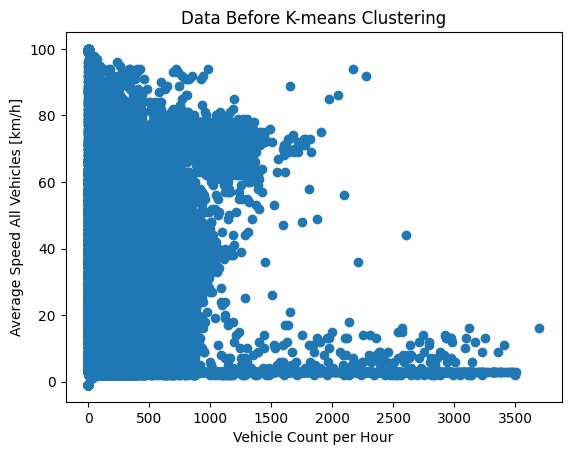

In [4]:
X = berlin_traffic[['vehicle_count_per_hour', 'avg_speed_all_vehicles_kmh', 'car_count_per_hour', 
        'avg_speed_cars_kmh', 'truck_count_per_hour', 'avg_speed_trucks_kmh']]

# İki boyutlu olarak veriyi K-means öncesi göster:
plt.scatter(berlin_traffic['vehicle_count_per_hour'], berlin_traffic['avg_speed_all_vehicles_kmh'])
plt.xlabel('Vehicle Count per Hour')
plt.ylabel('Average Speed All Vehicles [km/h]')
plt.title('Data Before K-means Clustering')
plt.show()

In [5]:
# Veriyi standartlaştır (ölçeklendirme yap):
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

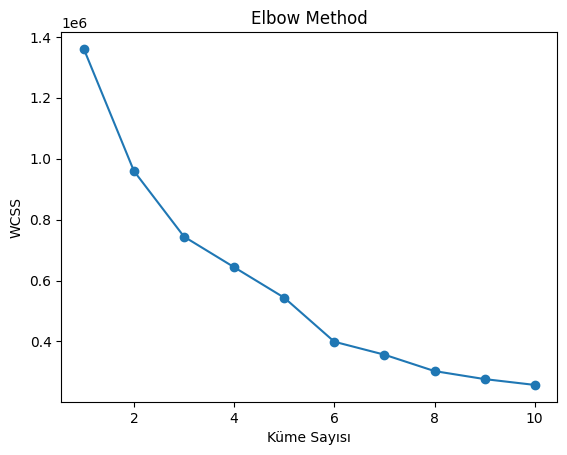

In [6]:

# WCSS değerlerini hesaplayıp listeye ekle:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Diz Dirseği Grafiğini çiz:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

In [7]:
# K-means modeli oluştur ve eğit (3 Küme ile): 
kmeans = KMeans(n_clusters=3, random_state=345)
kmeans.fit(X_scaled)

# Küme etiketlerini veriye ekle:
berlin_traffic['cluster'] = kmeans.labels_

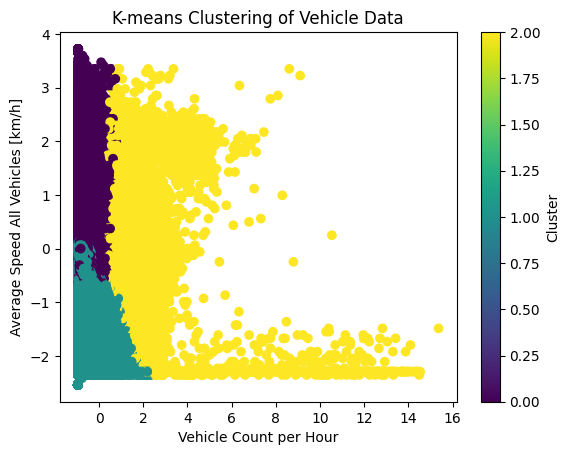

In [8]:
# K-means sonrası veriyi iki boyutlu olarak göster:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=berlin_traffic['cluster'], cmap='viridis')

# Eksen etiketleri ve başlık:
plt.xlabel('Vehicle Count per Hour')
plt.ylabel('Average Speed All Vehicles [km/h]')
plt.title('K-means Clustering of Vehicle Data')

# Renk haritası (colorbar) ekleme:
plt.colorbar(label='Cluster')
plt.show()

